# Modelo 2 - Hierarchical

### Carga de datos procesados

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

In [34]:
# Lectura de datos
df_customer = pd.read_csv('../datos/procesados/marketing_campaign_processed.csv')
df_customer.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_gasto
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,6,5,0,0,0,0,0,0,0,422


In [35]:
# Inspección del df
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Dt_Customer          2236 non-null   int64  
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   i

In [36]:
# Revisión de regitros únicos para Education
df_customer.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### One Hot Encoder - Ordinal Encoder - Escalamiento/Estandarización

In [37]:
# Selección de columnas para OneHot, Orinal y Standard
col_one_hot = ['Marital_Status']
col_ordinal = ['Education']
orden_ordinal = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
col_numericas_no_binarias = [col for col in df_customer.columns[:19] if df_customer[col].dtype != 'object'] + ['Total_gasto']

In [38]:
# Preprocesador con columntransformer para aplicar OneHot, Ordinal y Standard
preprocesador = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), col_one_hot), # handle ignora categorias nuevas - sparse_output genera una matriz más manejable
    ('ordinal', OrdinalEncoder(categories=orden_ordinal), col_ordinal),
    ('scaler', StandardScaler(), col_numericas_no_binarias)
], remainder='passthrough')

In [39]:
# Preprocesamiento de la data
df_customer_preprocesado = preprocesador.fit_transform(df_customer)

### Modelo sin PCA

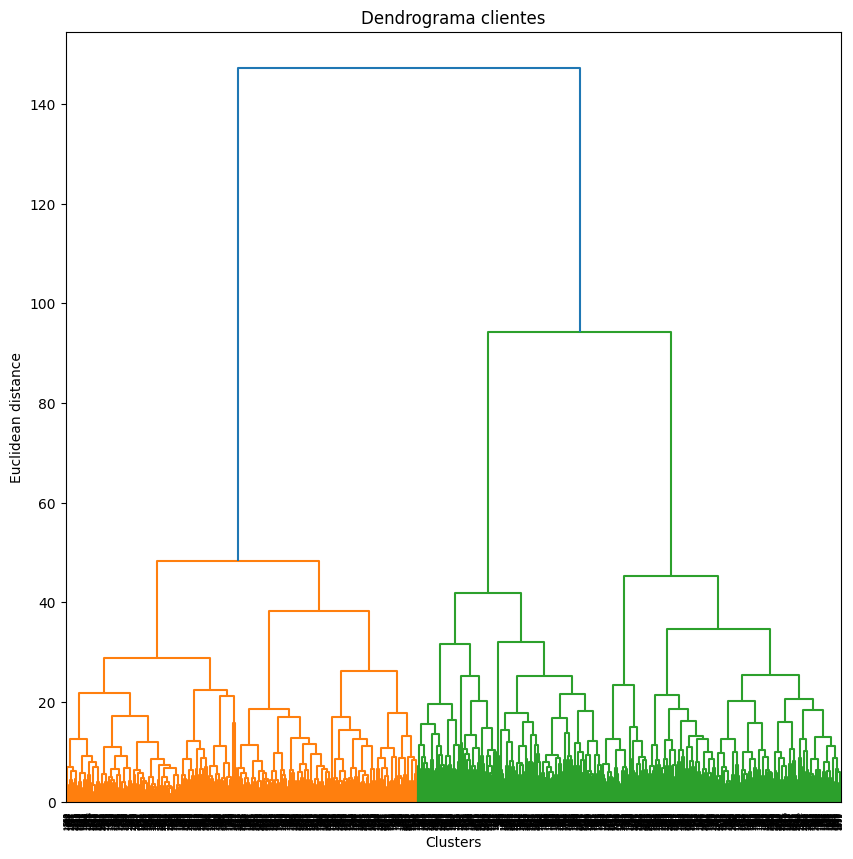

In [ ]:
# Graficar dendograma
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_customer_preprocesado, method='ward'))
plt.title('Dendrograma clientes')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Aplicación del modelo
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_customer_preprocesado)
print(silhouette_score(df_customer_preprocesado,y_hc))
df_customer['hc'] = y_hc

0.21390464028070239


### Evaluación del modelo sin PCA

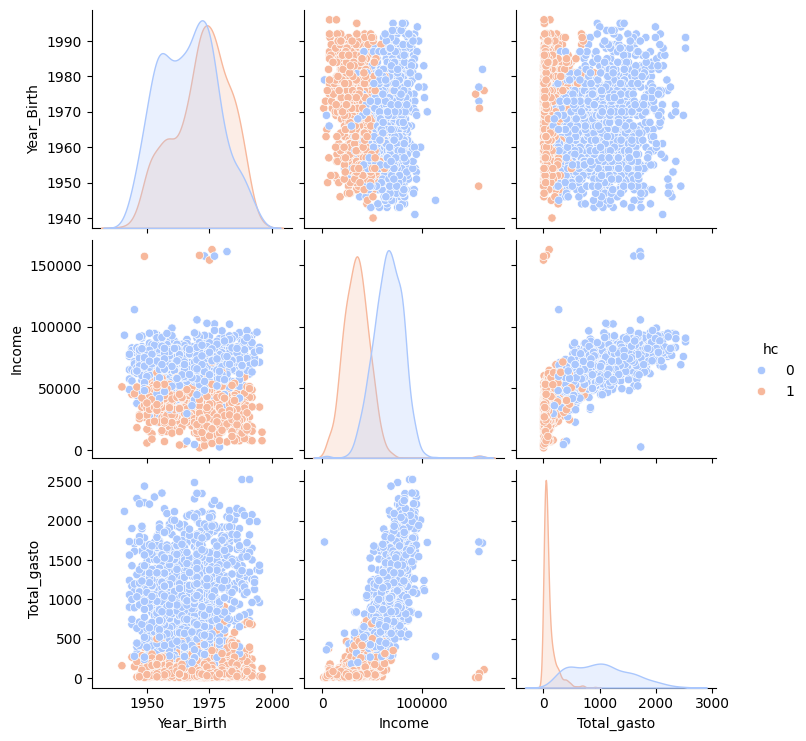

In [ ]:
# Evaluación del modelo con algunas variables
sns.pairplot(df_customer[['Year_Birth', 'Income', 'Total_gasto', 'hc']], hue='hc', palette='coolwarm')
plt.show();

### Modelo con PCA

In [ ]:
# Aplicación de PCA
pca = PCA()
pca.fit(df_customer_preprocesado)
pca_data_preprocesada = pca.transform(df_customer_preprocesado)
pca_data_preprocesada

array([[ 4.20211911e+00,  4.12746324e-02, -2.15638422e+00, ...,
        -4.11675330e-03, -2.60902411e-15,  5.53187000e-15],
       [-2.53936882e+00, -1.44104751e-01,  1.68232038e+00, ...,
        -1.36918551e-03,  6.66133815e-16,  3.01364534e-16],
       [ 1.88320816e+00, -3.44940099e-01, -1.27507903e-02, ...,
        -1.23652948e-04, -1.94289029e-15, -2.68139041e-15],
       ...,
       [ 1.57494386e+00, -9.51449526e-01,  4.38491672e-01, ...,
         2.62474633e-05,  6.99440506e-15,  8.40865125e-15],
       [ 2.04413887e+00,  7.94156312e-01,  1.86262005e+00, ...,
        -6.80485802e-04, -2.10942375e-15,  4.43376840e-16],
       [-1.84839900e+00,  1.76167846e+00,  4.47733444e-01, ...,
         2.71739623e-03, -3.21964677e-15, -1.28235749e-15]],
      shape=(2236, 34))

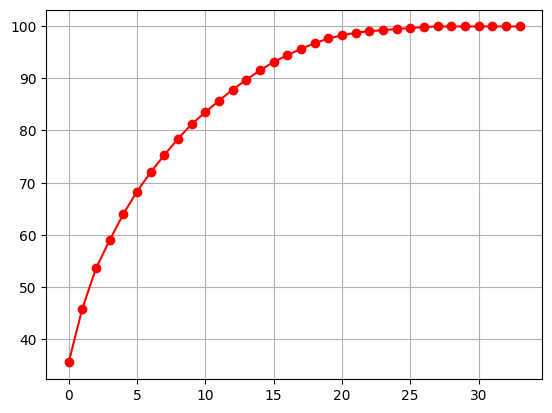

In [ ]:
# Gráfica de varianza acumulada
varianza = pca.explained_variance_ratio_
suma_acumulada = np.cumsum(np.round(varianza, decimals=3)*100)
plt.plot(suma_acumulada, 'r-o')
plt.grid()
plt.show();

In [ ]:
# Creación del df con la cantidad de columnas de acuerdo con los resultados de PCA
pca_df_customer_preprocesado = pd.DataFrame(pca_data_preprocesada) # Crea un df con la data escalada
pca_df_customer_preprocesado.drop(columns=pca_df_customer_preprocesado.columns[11:], inplace=True)

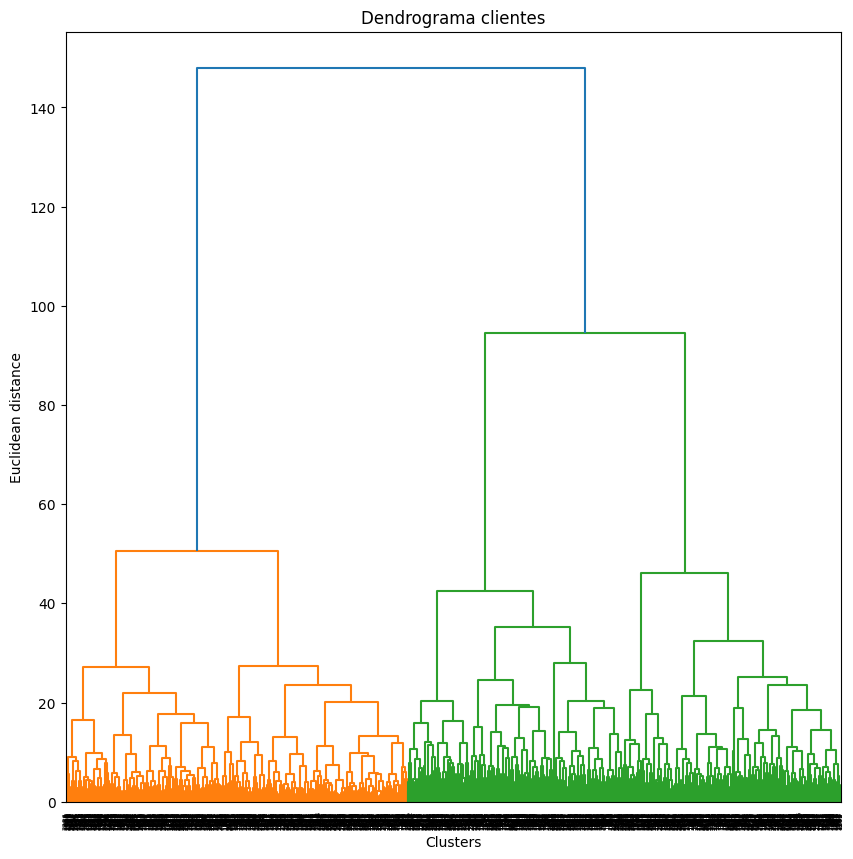

In [ ]:
# Graficar dendograma
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_df_customer_preprocesado, method='ward'))
plt.title('Dendrograma clientes')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
# Aplicación del modelo con PCA
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_df_customer_preprocesado)
print(silhouette_score(pca_df_customer_preprocesado,y_hc))
df_customer['hc_pca'] = y_hc

0.25656657483901824


### Evaluación del modelo con PCA

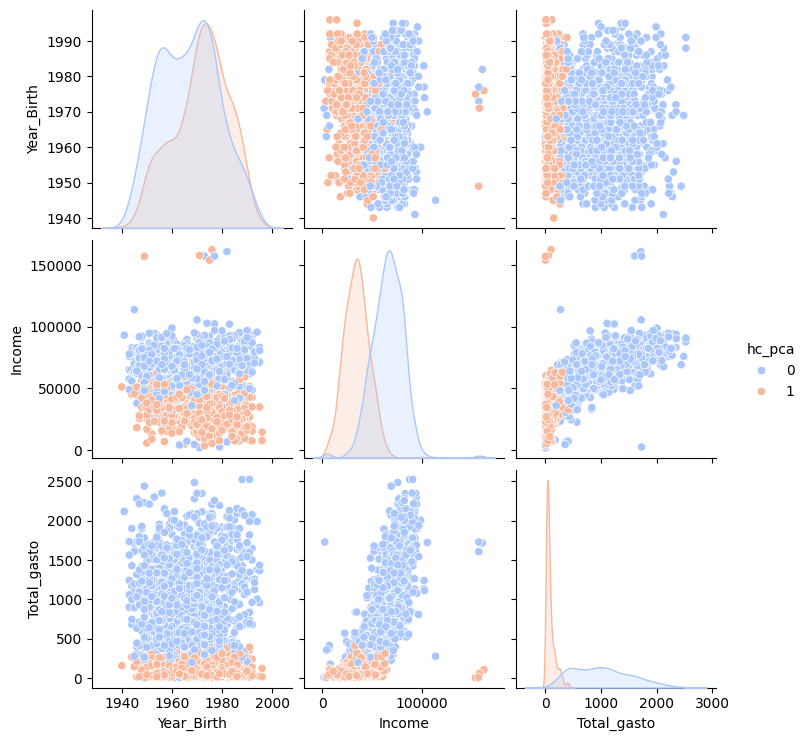

In [ ]:
# Evaluación del modelo con PCA con algunas variables
sns.pairplot(df_customer[['Year_Birth', 'Income', 'Total_gasto', 'hc_pca']], hue='hc_pca', palette='coolwarm')
plt.show();